#Analisando as notas em Geral:

Importando os dados: 

In [ ]:
import pandas as pd

notas=pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Vendo quantas linhas e quantas colunas tem em cada dado: 

In [ ]:
notas.shape


(100836, 4)

Mudando o nome das colunas, no caso só colocaremos em português:

In [ ]:
notas.columns=["usuario.ID","filmeID","nota","momento"]
notas.head()

,usuario.ID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Agora veremos quais notas foram dadas dentro desse conjunto de dados:

In [ ]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Vendo quantas vezes cada nota foi dada:

In [ ]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

O value_counts já ordena pra gente desde o mais contado até o menos contado!

Vamos agora tirar a médiadas notas:

In [ ]:
notas['nota'].mean()

3.501556983616962

Vamos agora explorar nossos dados de maneira visual, vamos plotar em um histograma:

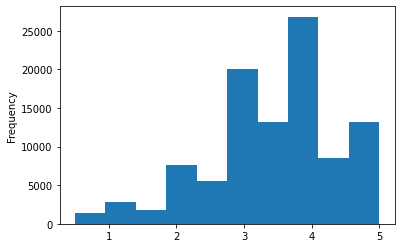

In [ ]:
notas.nota.plot(kind='hist')

Vamos verificar também qual é a mediana ( valor que separa metade dos dados a esquerda e metade dos dados a direita):

In [ ]:
notas.nota.median()

3.5

Vamos ver diversas medidas do conjunto de dados:

In [ ]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


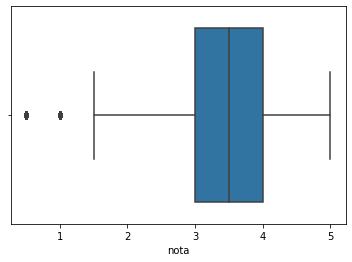

In [ ]:
import seaborn as sns #Vamos plotar um boxplot, para isso utilizaremos o boxplot

sns.boxplot(notas.nota)

Através do descrive e do boxplot, podemos perceber que metade das notas estão entra 4 e 5!


Vamos ver quais os filmes que nosso conjunto de dados possui:

In [ ]:
filmes=pd.read_csv("movies.csv")
filmes.columns=["filmeId","titulo","generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Analisando notas de Filmes Específicos 

Vamos primeiramente analisar as notas do filme Toy Story:

In [ ]:
# A ID do filme toy story é 1, logo:

notas.query("filmeID==1") # Vai nos retornar os dados do  filme de ID 1(Toy Story)

,usuario.ID,filmeID,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


Então calculamos a média das notas de Toy Story:

In [ ]:
notas.query("filmeID==1").nota.mean()

3.9209302325581397

Toy Story teve uma nota média maior que os outros filmes desse conjunto de dados.

Vamos agora ver a média das notas de todos os filmes Dataframe:

In [ ]:
notas.groupby("filmeID").mean() # Vai ser mostrado na coluna nota

,usuario.ID,nota,momento
filmeID,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


Vamos separar somente a coluna nota:

In [ ]:
notas.groupby("filmeID").mean()["nota"] # Repare que o Dataframe gerado não possui index!

filmeID
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [ ]:
medias_por_filme=notas.groupby("filmeID").mean()["nota"]
medias_por_filme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

 Vamos plotar as médias de todos os filmes!

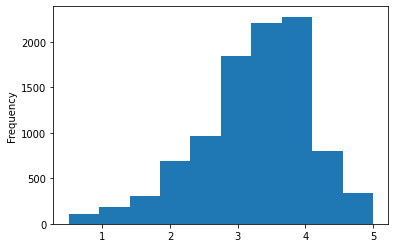

In [ ]:
medias_por_filme.plot(kind='hist')

Podemos utilizar também outras bibliotecas para visualizar esses dados!


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


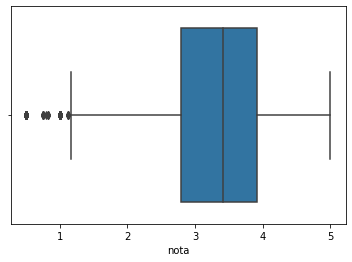

In [ ]:
sns.boxplot(medias_por_filme)

In [ ]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

Metade das médias estão acima de 3,5 e metade das médias estão abaixo desse valor!

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


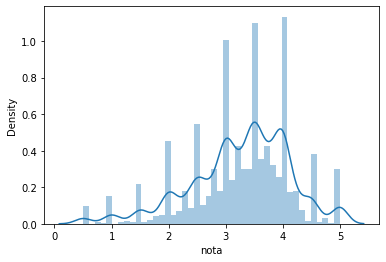

In [ ]:
sns.distplot(medias_por_filme) #Histograma, porém ele leva esse nome no seaborn
                               # Ele irá nos dar um número maior de bins

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


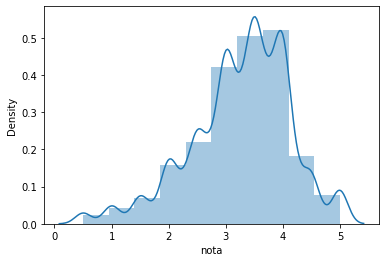

In [ ]:
# Vamos colocar o mesmo número de bins que o do pandas:
sns.distplot(medias_por_filme,bins=10) 

A curva que o seaborn mostra é uma aproximação de como os dados se distribuem!

Tanto o Pandas quanto o Seaborn utilizam o matplotlib por trás para plotar esse gráfico

Text(0.5, 1.0, 'Histograma das médias dos filmes')

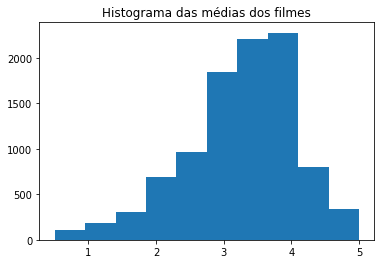

In [ ]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

Colocando o boxplot na vertical e colocando um tamanho diferente da figura:

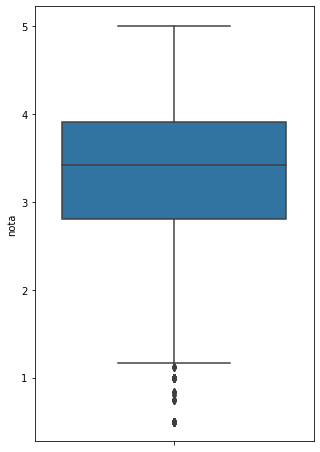

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

# Importando dados da Base do tmdb:

Importando os dados do tmdb:

In [ ]:
tmdb=pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Vamos ver quais línguas temos na database

In [ ]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

Vamos agora contar quantas vezes cada categoria de língua aparece:

In [ ]:
tmdb['original_language'].value_counts()

en    5312
fr      76
zh      34
es      34
de      29
hi      20
ja      17
it      15
ru      13
ko      13
cn      13
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
te       2
ro       2
id       2
ar       2
ky       1
ps       1
sl       1
no       1
hu       1
vi       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
el       1
Name: original_language, dtype: int64

Extraimos em uma única série, os dados de value_counts()

In [ ]:
tmdb['original_language'].value_counts().index # Os indices da série

Index(['en', 'fr', 'zh', 'es', 'de', 'hi', 'ja', 'it', 'ru', 'ko', 'cn', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'te', 'ro', 'id', 'ar',
       'ky', 'ps', 'sl', 'no', 'hu', 'vi', 'pl', 'af', 'nb', 'tr', 'is', 'xx',
       'el'],
      dtype='object')

In [ ]:
tmdb['original_language'].value_counts().values #Os valores da série 

array([5312,   76,   34,   34,   29,   20,   17,   15,   13,   13,   13,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    2,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

Se quisermos transformar em um dataframe usamos a função to_frame()

In [ ]:
tmdb['original_language'].value_counts().to_frame()

,original_language
en,5312
fr,76
zh,34
es,34
de,29
hi,20
ja,17
it,15
ru,13
ko,13


Se quisermos que o indice vire uma coluna,fazemos:

In [ ]:
contagem_de_lingua=tmdb['original_language'].value_counts().to_frame().reset_index()
#Renomeando as colunas:
contagem_de_lingua.columns=['original_language','total']
contagem_de_lingua.head()

,original_language,total
0,en,5312
1,fr,76
2,zh,34
3,es,34
4,de,29


Agora plotaremos plotes de categorias:

Utilizaremos o gráfico de barras

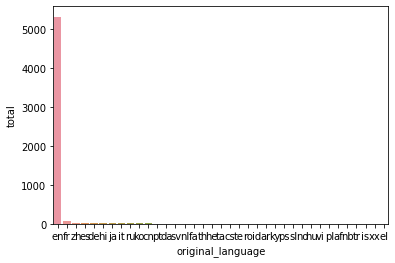

In [ ]:
sns.barplot(data=contagem_de_lingua,x='original_language',y='total')

Podemos plotar também diretamente do tmbd, sem ter que transformar em Dataframe, porém utilizando outra função do seaborn:

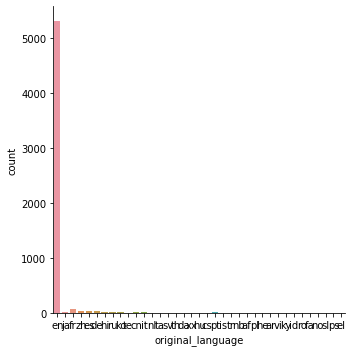

In [ ]:
sns.catplot(x='original_language',data=tmdb,kind="count")

Esse gráfico não mostra direito as informações!

Será que existe outras maneiras de representar essa informação?

Vamos tentar o gráfico de pizza ( gráfico de torta em inglês)

([<matplotlib.patches.Wedge at 0x7f338998e850>,
 [Text(-1.082109185377811, 0.1975846930330638, 'en'),
  Text(1.0445590492258416, -0.34481356220486137, 'fr'),
  Text(1.0637253287912396, -0.2801578570876948, 'zh'),
  Text(1.0735779044082945, -0.2396465797091524, 'es'),
  Text(1.0813299747881762, -0.20180556390893317, 'de'),
  Text(1.0864379542412044, -0.1721992206259565, 'hi'),
  Text(1.0897581443696696, -0.14975709258654418, 'ja'),
  Text(1.0922559043178257, -0.1302959687897098, 'it'),
  Text(1.0941563997552797, -0.1132332675257798, 'ru'),
  Text(1.09568250216811, -0.09736454407344533, 'ko'),
  Text(1.0969784701695815, -0.08147537041587871, 'cn'),
  Text(1.0978951054579504, -0.06801718467766753, 'pt'),
  Text(1.0984580543153883, -0.05822287273616293, 'da'),
  Text(1.098822929469208, -0.05087405697119467, 'sv'),
  Text(1.0990643228319221, -0.04536093338996506, 'nl'),
  Text(1.0992556734565018, -0.04045941637855161, 'fa'),
  Text(1.099405173935776, -0.03616992567377697, 'th'),
  Text(1.09

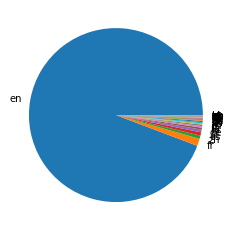

In [ ]:
plt.pie(contagem_de_lingua['total'],labels=contagem_de_lingua['original_language'])

O gráfico de pizza também não está passando a informação de maneira sucinta 

Na realidade, como é muito difícil compararmos áreas, ainda mais num gráfico que é função de \pi raramente se utiliza gráficos de pizza 

Vamos tentar agora comparar a língua inglesa com o restante das línguas:

In [ ]:
total_por_lingua=tmdb['original_language'].value_counts()
total_por_lingua

#Vamos separar somente o inglês
total_geral=total_por_lingua.sum()
total_de_ingles=total_por_lingua.loc["en"] # Vai retornar o valor do index en, ou seja 4505
total_do_resto=total_geral-total_de_ingles

print(total_de_ingles,total_do_resto)

5312 324


In [ ]:
dados = {
    'lingua': ['ingles','outros'],
    'total': [total_de_ingles,total_do_resto]
}
dados=pd.DataFrame(dados)
dados

,lingua,total
0,ingles,5312
1,outros,324


Agora vamos fazer um plot do dataframe que armazenamos em dados:

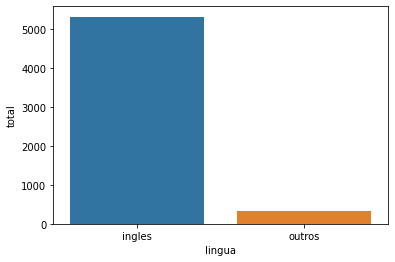

In [ ]:
sns.barplot(x='lingua',y='total',data=dados)

([<matplotlib.patches.Wedge at 0x7f338eb77810>,
 [Text(-1.082109185377811, 0.1975846930330638, 'ingles'),
  Text(1.0821091691909952, -0.19758478168314092, 'outros')])

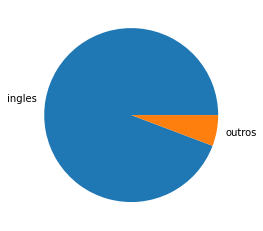

In [ ]:
plt.pie(dados["total"],labels=dados["lingua"])

Pode-se perceber que o gráfico de barras dá uma melhor noção de quantas vezes mais filmes em inglês tem na nossa base que o restante das outras línguas.

Mesmo se não tivessemos a legenda, ficar melhor a comparação no olhometro via gráfico de barras do que no gráfico de pizza. 

# Analisando os Filmes que não são em Inglês

Primeiramente, vamos separar os DatasFrames

In [ ]:
#Separando os filmes que não tem inglês como idioma oficial

filmes_sem_lingua_original_em_ingles=tmdb.query("original_language !='en'")

total_por_lingua_de_outros_filmes=tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    76
zh    34
es    34
de    29
hi    20
ja    17
it    15
ko    13
cn    13
ru    13
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
te     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

Utilizando o catplot para plotar o gráficos de como estão distribuídos os outros filmes que não tem como língua original o inglês:

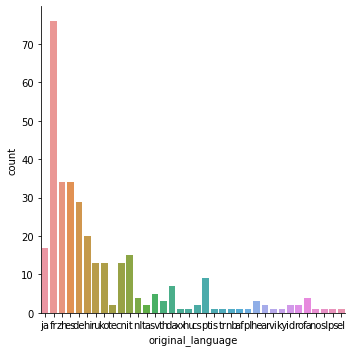

In [ ]:
sns.catplot(x='original_language',kind="count",data=filmes_sem_lingua_original_em_ingles)

O gráfico não está bem refinado! 

*OBS:Existem dois tipos de funções dentro do seaborn, as que estão em mais baixo nível, como o barplot, e que podemos alterá-la através de comandos do plt, como o plt.figure(figsize).
E tem funções que estão em um nível mais alto, como é o caso do catplot, que não será alterado por plt.figure(figsize)*

Mudamos a função aspect então

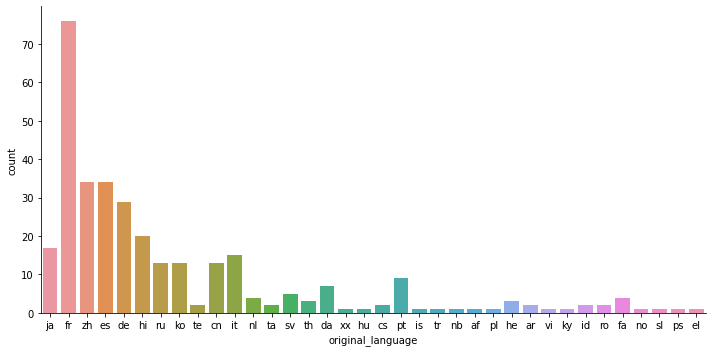

In [ ]:
#Aspect = 2 Vai retornar um retangulo 
#Aspect = 1 Vai retornar um quadrado
sns.catplot(x='original_language',kind="count",data=filmes_sem_lingua_original_em_ingles,aspect=2)

Agora vamos ordenar do maior para o menor:

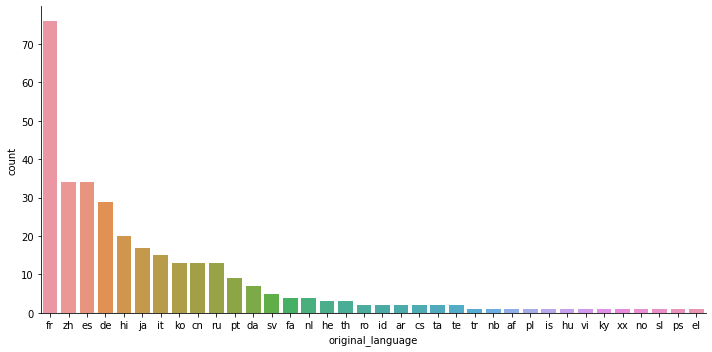

In [ ]:
sns.catplot(x='original_language',kind="count",data=filmes_sem_lingua_original_em_ingles,aspect=2,order=total_por_lingua_de_outros_filmes.index)

Vamos mudar a paleta de cores, deixando os filmes mais produzidos em um tom mais forte e os menos produzidos em um tom mais fraco

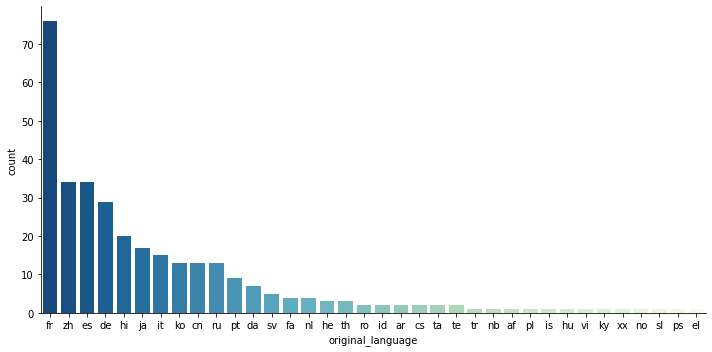

In [ ]:
sns.catplot(x="original_language",kind="count",
            data=filmes_sem_lingua_original_em_ingles,
            aspect = 2,
            palette="GnBu_r",
            order=total_por_lingua_de_outros_filmes.index)

# No códifo do Alura tava palette="GnBu_d", mas a palette estava na ordem errada, por isso fiz essa alteração 

In [ ]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


Vamos pegar as notas do toy story:

In [ ]:
notas_do_toy_story=notas.query("filmeID==1")
notas_do_jumanji=notas.query("filmeID==2")
print(len(notas_do_toy_story),len(notas_do_jumanji))

215 110


#Analisando diversos tipos de dados dos filmes:

Agora, vamos printar as médias do Toy Story:

In [ ]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())

Nota média do Toy Story 3.92


Agora a do Jumanji:

In [ ]:
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Jumanji 3.43


Jumanji possui uma nota média menor que o Toy Story, mas isso não fala muito sobre quantas pessoas deram nota baixa para o Toy Story e quantas pessoas deram notas boas para Jumanji.

Na prática ao calcularmos a média perdemos bastante informações sobre um determinado conjunto de dados. 

Normalmente resumir todo o conjunto de dados em um único número resulta em perda de informações

Vamos imprimir a mediana, para ver o que ela nos traz:

In [ ]:
print("Mediana do Toy Story %.2f" %notas_do_toy_story.nota.median())

print("Mediana do Jumanji %.2f" %notas_do_jumanji.nota.median())

Mediana do Toy Story 4.00
Mediana do Jumanji 3.50


Vamos mostrar um exemplo de perca de dados ao se analisar somente um número e não o conjunto inteiro:

In [ ]:
import numpy as np 

#Notas para um filme fictício, filme 1:
filme1= np.append(np.array([2.5]*10),np.array([3.5]*10)) #Muitas pessoas acharam o filme de médio para ruim e outras acharam de bom para médio
filme2=np.append(np.array([5]*10),np.array([1]*10)) #Muitas pessoas acharam o melhor filme já assistido na vida delas, outras acharam um dos ṕiores filmes que já viram 


Vamos agora analisar os dados estatísticos dos dois filmes:

In [ ]:
print( filme1.mean(),filme2.mean())
print( np.median(filme1), np.median(filme2))

3.0 3.0
3.0 3.0


Todos as estatisticas dão o mesmo valor , porém sabemos que o filme 1 teve uma avaliação "ok". Enquanto que no filme 2 houve grande disparidade.

Para analisar essa informação é muito melhor usarmos um gráfico de distribuição:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


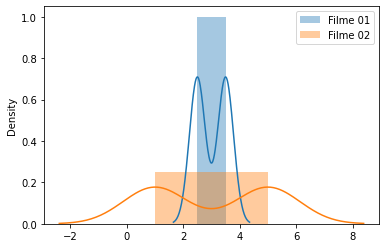

In [ ]:
sns.distplot(filme1,label= 'Filme 01')
sns.distplot(filme2,label= 'Filme 02')
plt.legend() #Adicionei legendas

A partir desse gráfico vemos que o filme 1 posui notas menos divergentes que o filme 2

Vamos ver agora um histograma:

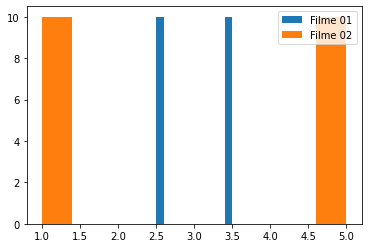

In [ ]:
plt.hist(filme1,label= 'Filme 01')
plt.hist(filme2,label= 'Filme 02')
plt.legend() #Adicionei legendas

Também conseguimos vizualisar melhor a distribuição do que vendo somente um dado

Vamos ver o boxplot:

{'boxes': [<matplotlib.lines.Line2D at 0x7f33867ce890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f33867d38d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f33867da910>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f33867da3d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f33867cee10>,
  <matplotlib.lines.Line2D at 0x7f33867df910>]}

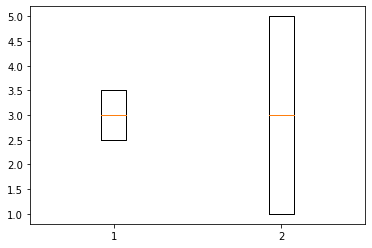

In [ ]:
plt.boxplot([filme1,filme2])

No Boxplot conseguimos ver que a mediana está no mesmo ponto, porém consegue-se ver que a distribuição no Filme 02 é muito maior 

É importante destacar aqui que o plt deu um boxplot melhor que o do sns.

Vamos analisar o Boxplot via plt dos dois filmes reais:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7f33866dad10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f33866e1d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3386668d50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3386668810>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f33866e1290>,
  <matplotlib.lines.Line2D at 0x7f3386671d50>]}

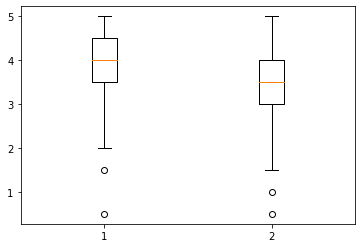

In [ ]:
plt.boxplot([notas_do_toy_story.nota,notas_do_jumanji.nota])

Vamos usar o sns para fazer o mesmo do que de cima:

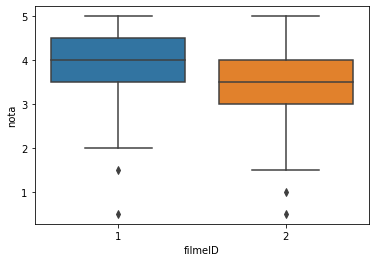

In [ ]:
sns.boxplot(x="filmeID",y="nota",data=notas.query("filmeID in [1,2]"))

Vamos ver o dos 5 primeiros filmes:

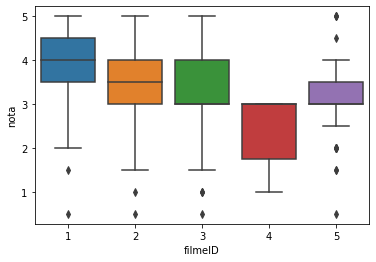

In [ ]:
sns.boxplot(x="filmeID",y="nota",data=notas.query("filmeID in [1,2,3,4,5]"))

Será que não existe uma maneira de ver o quanto as notas desviam de uma tendencia central?

Sim! pelo desvio padrão!! 

In [ ]:
print(notas_do_toy_story.nota.std(),notas_do_jumanji.nota.std()) #Desvio padrão dos dois filmes reais 

0.8348591407114047 0.8817134921476455


Agora para o caso fictíco:

In [ ]:
print(np.std(filme1),np.std(filme2))

0.5 2.0


Podemos ver que o desvio padrão de 01 foi bem menor que 2 

*Na prática quando temos média e desvio padrão conseguimos uma melhor distribuição dos dados!*